Notebook for testing convolutional neural nets

In [1]:
#Import all necessary packages
from nn_packages import *
from io_functions import *
import numpy as np
import root_numpy as rnp
import os
import sys
import re
import glob
import h5py
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using gpu device 1: GeForce GTX TITAN X (CNMeM is disabled, cuDNN not available)
Using Theano backend.


Couldn't import dot_parser, loading of dot files will not be possible.


Welcome to ROOTaaS 6.06/04


In [ ]:
#List of summaries of previously used CNNs to pick a previously used model if need be
dir='/home/kaustuv1993/Notebooks/models/'
for file in os.listdir(dir):
    if file.startswith('cnn'):
        print file
        json_file = open('%s%s' % (dir,file), 'r')
        loaded_model_json = json_file.read()
        json_file.close()
        model = model_from_json(loaded_model_json)
        print (model.summary())
        print ('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n')

In [2]:
#ConvNet - 3D, 6/7
cnn3d_1 = Sequential()
cnn3d_1.add(Convolution3D(10, 4, 4, 5, input_shape = (1, 20, 20, 25), activation='relu'))
cnn3d_1.add(MaxPooling3D())
cnn3d_1.add(Flatten())

#Dense layer
cnn3d_1.add(Dense(1000, activation='relu'))
#cnn3d_1.add(Dense(input_dim=(100), output_dim =(1), activation='relu'))
cnn3d_1.add(Dropout(0.5))
cnn3d_1.add(Dense(1, activation='linear'))
#sgd=keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=True)
cnn3d_1.compile(loss='mse', optimizer='sgd')
#simple.load_weights('first_try.h5')
cnn3d_1.summary()

____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
convolution3d_1 (Convolution3D)    (None, 3, 17, 17, 21243         convolution3d_input_1[0][0]      
____________________________________________________________________________________________________
maxpooling3d_1 (MaxPooling3D)      (None, 3, 8, 8, 10) 0           convolution3d_1[0][0]            
____________________________________________________________________________________________________
flatten_1 (Flatten)                (None, 1920)        0           maxpooling3d_1[0][0]             
____________________________________________________________________________________________________
dense_1 (Dense)                    (None, 1000)        1921000     flatten_1[0][0]                  
___________________________________________________________________________________________

In [157]:
#ConvNet - 2D, 7/7
cnn2d_2 = Sequential()
#cnn2d_1.add(Convolution2D(10, 4, 4, input_shape = (25, 20, 20), activation='relu'))
#cnn2d_1.add(MaxPooling2D())
#cnn2d_1.add(Flatten())

#Dense layer
cnn2d_2.add(Dense(10000,input_shape=(10000,), activation='relu'))
cnn2d_2.add(Dense(input_dim=(100), output_dim =(1), activation='relu'))
#cnn2d_2.add(Dropout(0.25))
cnn2d_2.add(Dense(1, activation='linear'))
#sgd=keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=True)
cnn2d_2.compile(loss='mse', optimizer='sgd')
#simple.load_weights('first_try.h5')
cnn2d_2.summary()

____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
dense_15 (Dense)                   (None, 10000)       100010000   dense_input_3[0][0]              
____________________________________________________________________________________________________
dense_16 (Dense)                   (None, 1)           10001       dense_15[0][0]                   
____________________________________________________________________________________________________
dense_17 (Dense)                   (None, 1)           2           dense_16[0][0]                   
Total params: 100020003
____________________________________________________________________________________________________


In [13]:
check = ModelCheckpoint(filepath='/model/Dense_test.hdf5', verbose=1)
early = EarlyStopping(mon']itor='val_loss', patience=5, verbose=1, mode='auto')

In [ ]:
ds = My_Gen_E(10000, 10000)
vs = My_Gen_E(10000, 10000)
hist_1 = cnn2d_2.fit_generator(ds.train(cnn=False), samples_per_epoch=40000, nb_epoch=10, validation_data= vs.validation(cnn=False), nb_val_samples=40000,verbose=1, callbacks=[early])

Epoch 1/10
40000/40000 [==============================] - 174s - loss: 0.0801 - val_loss: 0.1014
Epoch 2/10
40000/40000 [==============================] - 104s - loss: 0.1003 - val_loss: 0.0922
Epoch 3/10
40000/40000 [==============================] - 166s - loss: 0.0917 - val_loss: 0.0816
Epoch 4/10
40000/40000 [==============================] - 118s - loss: 0.0707 - val_loss: 0.0811
Epoch 5/10
40000/40000 [==============================] - 158s - loss: 0.0810 - val_loss: 0.0918
Epoch 6/10
30000/40000 [=====================>........] - ETA: 12s - loss: 0.0745

In [ ]:
#savemodel(cnn2d_1,"cnn2d_1")
%matplotlib inline
show_losses([("mse",hist_1)],"Dense_test")

In [67]:
def test_per_energy(model):
    average_mse = []
    for i in xrange(10,110):
        print (i)
        
        fn =('/data/kaustuv1993/EnergyScan_Gamma/GammaEscan_%dGeV_fulldataset.h5'%i)
        f = h5py.File(fn,'r')
        test_data = np.array(f['images'])
        test_target=np.array(f['target'])
        test_data = np.swapaxes(test_data,1,3)
        #test_data= np.reshape(test_data,(10000,0))
        test_target = np.delete(test_target,0,1)
        pred = model.predict(test_data)
        print (pred*110., test_target)
        #print([test_target])
        #plt.hist( test_target - (np.ravel(pred[1]*110))/test_target[:] , label='energy resolution', bins=40)
        #plt.legend()
        #plt.show()
        #print(pred)
        #average_mse.append(pred)
    #print (average_mse)

In [68]:
test_per_energy(cnn2d_1)

10
10000/10000 [==============================] - 1s     
(array([[ 60.02593935],
       [ 60.02593935],
       [ 60.02593935],
       ..., 
       [ 60.02593935],
       [ 60.02593935],
       [ 60.02593935]]), array([[  67.],
       [  29.],
       [  71.],
       ..., 
       [ 109.],
       [  31.],
       [ 109.]]))
11
10000/10000 [==============================] - 1s     
(array([[ 60.02593935],
       [ 60.02593935],
       [ 60.02593935],
       ..., 
       [ 60.02593935],
       [ 60.02593935],
       [ 60.02593935]]), array([[ 37.],
       [ 86.],
       [ 96.],
       ..., 
       [ 68.],
       [ 73.],
       [ 37.]]))


In [69]:
loss = np.array(hist_1.history['loss'])
valoss = np.array(hist_1.history['val_loss'])
f = h5py.File("cnn2d_1.h5","r+")
f.create_dataset('loss',data=loss)
f.create_dataset('val_loss',data=valoss)
f.close()
#print (np.array(f['val_loss']))
#print (np.array(f['loss']))

In [75]:
data=np.array(get_dataset('/data/kaustuv1993/EnergyScan_Gamma/GammaEscan_*GeV_fulldataset'))
data[]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices


tab completion not implemented for this context


In [76]:
pred=cnn2d_1.predict()

TypeError: predict() takes at least 2 arguments (1 given)

In [89]:
def add(n, v ,e ):
    if n==None:
        return
    if add.A==None:
        add.A = n
    else:
        add.A = np.concatenate( (add.A,n) )
    
    
    ny = np.zeros( (n.shape[0], 2))
    ny[:,0] = bool(v)
    ny[:,1] = e
    
    if add.Y==None:
        add.Y = ny
    else:
        add.Y = np.concatenate( (add.Y, ny) )

In [142]:
add.A = None
add.Y = None
for energy in range(100,110):
    print energy
    s = get_dataset('/data/shared/LCD/GammaEscan/GammaEscan_*_%dGeV'%energy)
    #b = get_dataset('/data/vlimant/LCD/Pi0%dGeV'%energy)
    add( s, 1, energy)
    #add( b, False, energy)
    #print sigs[energy].shape
    #print bkgs[energy].shape
X = add.A
y = add.Y

100
init
(10000, 20, 20, 25)
101
init
(10000, 20, 20, 25)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.



102
init
(10000, 20, 20, 25)
103
init
(10000, 20, 20, 25)
104
init
(10000, 20, 20, 25)
105
init
(10000, 20, 20, 25)
106
init
(10000, 20, 20, 25)
107
init
(10000, 20, 20, 25)
108
init
(10000, 20, 20, 25)
109
init
(10000, 20, 20, 25)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:14: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [143]:
print (X.shape, y.shape)

((100000, 20, 20, 25), (100000, 2))


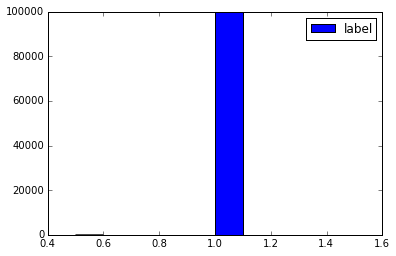

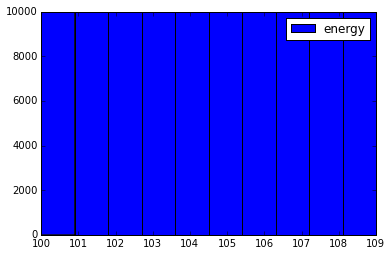

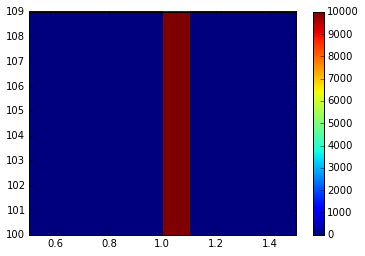

In [144]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(y[:,0], label='label')
plt.legend()
plt.show()
plt.hist(y[:,1], label='energy')
plt.legend()
plt.show()
plt.hist2d(y[:,0],y[:,1], label='data')
plt.legend()
plt.colorbar()
plt.show()

In [145]:
x=np.swapaxes(X,1,3)

In [146]:
X.shape

(100000, 25, 20, 20)

In [169]:
pred = cnn2d_2.predict_on_batch(X.reshape(X.shape[0],10000))
print (pred)

[[ 0.39933881]
 [ 0.39933881]
 [ 0.39933881]
 ..., 
 [ 0.39933881]
 [ 0.39933881]
 [ 0.39933881]]


In [148]:
x[1,...].reshape((1,25,20,20)).shape

(1, 25, 20, 20)

In [170]:
np.ravel(pred)

array([ 0.39933881,  0.39933881,  0.39933881, ...,  0.39933881,
        0.39933881,  0.39933881], dtype=float32)

In [163]:
u, count = np.unique(pred, return_counts=True)
print (u, count)

(array([ 0.39933881]), array([100000]))


In [ ]:
ds = My_Gen_E(10000, 10000)
#vs = My_Gen_E(10000,10000)
#count = 0
#print(len(ds.filelist))
for (data, target) in ds.train():
    #print('count is ',count)
    #code to check for unique rows in the data
    ncols = data.shape[1]
    dtype = data.dtype.descr * ncols
    struct = data.view(dtype)
    uniq = np.unique(struct)
    uniq = uniq.view(data.dtype).reshape(-1, ncols)
    #code to check for the number of unique rows (energy) in targets
    count2 = np.unique(target, return_counts=True)[1]
    print(uniq.shape[0],count2.shape[0])